In [121]:
!pip install albumentations==0.4.6

     |████████████████████████████████| 117 kB 8.0 MB/s 
     |████████████████████████████████| 948 kB 41.2 MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-py3-none-any.whl size=65172 sha256=1925031e922e8aea0126e353f200ebbba34f482c4e93365aab74d76b304fd065
  Stored in directory: /root/.cache/pip/wheels/cf/34/0f/cb2a5f93561a181a4bcc84847ad6aaceea8b5a3127469616cc
Successfully built albumentations
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [189]:
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np
from PIL import Image

In [190]:
image_df = pd.read_csv('/content/Image_file.csv')

In [191]:
image_df.head()

,Anchor_image,Positive_image,Negative_image
0,/content/Image2.jpg,/content/Image1.jpg,/content/Image3.jpg
1,/content/Image2.jpg,/content/Image1.jpg,/content/Image3.jpg
2,/content/Image2.jpg,/content/Image1.jpg,/content/Image3.jpg
3,/content/Image2.jpg,/content/Image1.jpg,/content/Image3.jpg
4,/content/Image2.jpg,/content/Image1.jpg,/content/Image3.jpg


In [192]:
image_df.shape

(14, 3)

Text(0.5, 1.0, 'Negative_image')

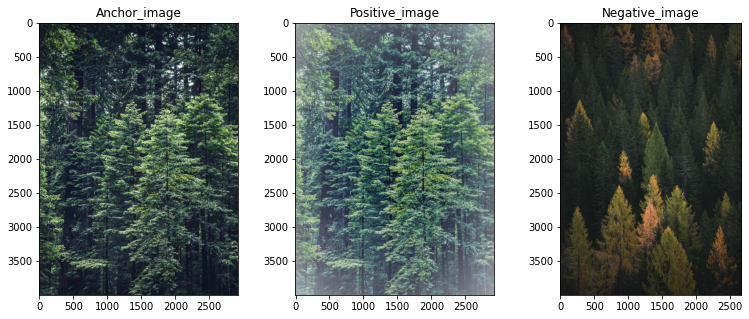

In [193]:
#let's display the images from the sheet
plt.figure(figsize=(13,5))
plt.subplot(1,3,1)
image = cv2.imread(image_df.loc[0, 'Anchor_image'])
#convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title('Anchor_image')

plt.subplot(1,3,2)
image = cv2.imread(image_df.loc[0, 'Positive_image'])
#convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title('Positive_image')

plt.subplot(1,3,3)
image = cv2.imread(image_df.loc[0, 'Negative_image'])
#convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title('Negative_image')

In [194]:
#defining custom dataset for the specific requirement
class TreeDataset(Dataset):
  def __init__(self, image_file, transform):
    
    '''
    Read the csv file and set the corresponding variables
    '''
    self.image_df = pd.read_csv(image_file)  
    self.transform = transform

  def __len__(self):
    '''
    Defining the length of the dataset
    '''    
    return len(self.image_df)

  def __getitem__(self, idx):
    '''
    Process the images from the dataset
    Perform the transformation and return the result to the dataloader
    '''       
    anchor_name = self.image_df.loc[idx, 'Anchor_image']    
    positive_name = self.image_df.loc[idx, 'Positive_image']
    negative_name = self.image_df.loc[idx, 'Negative_image']    

    anchor_image = np.array(Image.open(anchor_name))
    positive_image = np.array(Image.open(positive_name))
    negative_image = np.array(Image.open(negative_name))

    anchor = self.transform(image = anchor_image)
    positive = self.transform(image = positive_image)
    negative = self.transform(image = negative_image)

    return (anchor, positive, negative)

In [195]:
transform = A.Compose([
A.Resize(width=224, height=224),
A.Rotate(limit=10, p=0.9, border_mode=cv2.BORDER_CONSTANT),
A.RandomBrightnessContrast(),
A.HorizontalFlip(p=0.5),
A.VerticalFlip(p=0.1),
A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25, p=0.9)])

In [196]:
#To get the data, we need to pass the excel file to the custom dataset

custom_data = TreeDataset('/content/Image_file.csv', transform)

In [197]:
#using the dataloader, define batchsize to retrive data custom data
custom_loader = DataLoader(custom_data, batch_size = 4, shuffle=True)

In [198]:
#let's retrieve only one set from the custom loader
count = 0

for i, (anchor, positive, negative) in enumerate(custom_loader):
  count += 1

  print('anchor images for batch%2d:'%(count), anchor['image'].shape)
  print('positive image for batch%2d:'%(count), positive['image'].shape)
  print('negative image for batch%2d:'%(count), negative['image'].shape, '\n')

anchor images for batch 1: torch.Size([4, 224, 224, 3])
positive image for batch 1: torch.Size([4, 224, 224, 3])
negative image for batch 1: torch.Size([4, 224, 224, 3]) 

anchor images for batch 2: torch.Size([4, 224, 224, 3])
positive image for batch 2: torch.Size([4, 224, 224, 3])
negative image for batch 2: torch.Size([4, 224, 224, 3]) 

anchor images for batch 3: torch.Size([4, 224, 224, 3])
positive image for batch 3: torch.Size([4, 224, 224, 3])
negative image for batch 3: torch.Size([4, 224, 224, 3]) 

anchor images for batch 4: torch.Size([2, 224, 224, 3])
positive image for batch 4: torch.Size([2, 224, 224, 3])
negative image for batch 4: torch.Size([2, 224, 224, 3]) 



Text(0.5, 1.0, 'Negative_image')

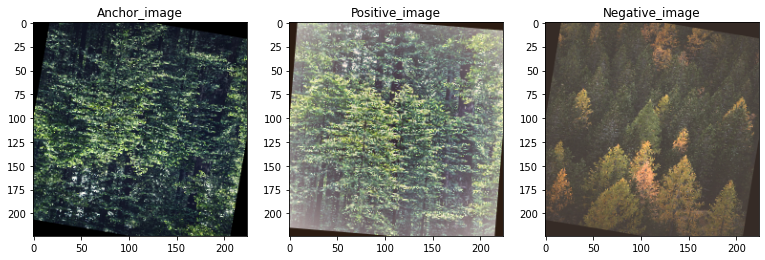

In [199]:
#let's display some images 
#let's display the images from the sheet
plt.figure(figsize=(13,5))
plt.subplot(1,3,1)
plt.imshow(anchor['image'][0])
plt.title('Anchor_image')

plt.subplot(1,3,2)
plt.imshow(positive['image'][0])
plt.title('Positive_image')

plt.subplot(1,3,3)
plt.imshow(negative['image'][0])
plt.title('Negative_image')